## Preliminares

In [1]:
import numpy as np
import scipy
import scipy.stats
#import matplotlib as mpl
import matplotlib.pyplot as plt
#plt.style.use('classic')
#%matplotlib inline

In [2]:
from os import listdir
import os
from os.path import isfile, join
import pickle

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
# Estos son mis directorios
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Teo_info_proyecto_d'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
# Funcion para calcular determinante de la matriz quitando una de las variables
def teor_detcm_condit_other_vars_fn(covmat, n):
  m = []
  for i in range(0,n):
    covmat_less_one = np.delete(covmat, i, axis=0)
    covmat_less_one = np.delete(covmat_less_one, i, axis=1)
    teor_detcm_condit_other_vars_i = np.linalg.det(covmat_less_one)
    m.append(teor_detcm_condit_other_vars_i)
  return np.array(m)

## Ejemplo para alguna distribución Gaussiana
Para entender cómo funciona el algoritmo Copulas

In [5]:
# Gaussiana multivariada N-dim

#N = 3 # Dimensión
#T = 10000 # Número de muestras a generar

# Generación matriz
#covmat = np.random.rand(N,N)
#covmat = 0.5*(covmat + np.transpose(covmat))
#np.fill_diagonal(covmat,N)

# Media
#mu = np.zeros(N)
#covmat


In [6]:
# DATA serán los datos a utilizar

#DATA = np.random.multivariate_normal(mu,covmat,T) # Generación de datos
#DATA.shape

In [ ]:
# Algoritmo para metodo Copulas

N = DATA.shape[1]
T = DATA.shape[0]
sort_id = DATA.argsort(axis=0) # Índices que ordenan (rankean) los datos
sort_id = sort_id + 1

copdata = sort_id.argsort(axis=0) # Índices que ordenan el ranking de los datos
copdata = copdata + 1
copdata = copdata / (T+1) # Normalización a [0,1]

# Usar inversa de CDF de la distribución normal estándar 
gaussian_data = scipy.stats.norm.ppf(copdata) # Datos uniformes a datos gaussianos
gaussian_data[np.isinf(gaussian_data)] = 0 # Remover infinitos

# Cálculo matriz de covarianza segun Gaussian copulas
covmat_gc = np.matmul(np.transpose(gaussian_data),gaussian_data)/(T-1) 

# Medidas usando matriz obtenida por copulas
# Ahora se trata la data como si fuera una distribucion gaussiana con matriz de covarianza "covmat_gc"

teor_detcm = np.linalg.det(covmat_gc) # Determinante matriz de covarianza
teor_detcm_condit_other_vars = teor_detcm_condit_other_vars_fn(covmat_gc, N) # Determinantes de matrices de covarianza sin considerar 1 variable
teor_single_vars = np.diagonal(covmat_gc) # Varianza de cada variable

#Entropias

teor_var_ents = 0.5*np.log(((2*np.pi*np.exp(1)))*teor_single_vars)# Entropía teórica de cada variable
teor_entropy = 0.5*(np.log((2*np.pi*np.exp(1))**N) + np.log(teor_detcm)) # Entropía conjunta teórica de la Gaussiana multivariante
teor_ent_condit_other_vars = 0.5*(np.log((2*np.pi*np.exp(1))**(N-1)) + np.log(teor_detcm_condit_other_vars)) # Entropía de 1 variable condicional a las otras otras variables

# TC, DTC, O-info, S-info (en nats)
teor_tc = sum(teor_var_ents) - teor_entropy
teor_dtc = sum(teor_ent_condit_other_vars) - (N-1)*teor_entropy
teor_oinfo = teor_tc - teor_dtc
teor_sinfo = teor_tc + teor_dtc

# TC, DTC, O-info (en bits)
teor_tc = round(teor_tc/np.log(2),4)
teor_dtc = round(teor_dtc/np.log(2),4)
teor_oinfo = round(teor_oinfo/np.log(2),4)

In [ ]:
print('Las medidas de información calculadas por Gaussian copula (en bits) :')
print('Total correlation:   ' + str(teor_tc))
print('Dual total correlation:   ' + str(teor_dtc))
print('O-information:   ' + str(teor_oinfo))

## Análisis datos generados por Whole-brain DMF model

In [7]:
# Descomprimir datos en la carpeta del Drive
!unzip '/content/gdrive/My Drive/Teo_info_proyecto_d/dmn.zip' -d '/content/gdrive/My Drive/Teo_info_proyecto_d/dmn'

Archive:  /content/gdrive/My Drive/Teo_info_proyecto_d/dmn.zip
  inflating: /content/gdrive/My Drive/Teo_info_proyecto_d/dmn/samples_1.txt  
  inflating: /content/gdrive/My Drive/Teo_info_proyecto_d/dmn/samples_2.txt  
  inflating: /content/gdrive/My Drive/Teo_info_proyecto_d/dmn/samples_3.txt  
  inflating: /content/gdrive/My Drive/Teo_info_proyecto_d/dmn/samples_4.txt  
  inflating: /content/gdrive/My Drive/Teo_info_proyecto_d/dmn/samples_5.txt  
  inflating: /content/gdrive/My Drive/Teo_info_proyecto_d/dmn/samples_6.txt  
  inflating: /content/gdrive/My Drive/Teo_info_proyecto_d/dmn/samples_7.txt  
  inflating: /content/gdrive/My Drive/Teo_info_proyecto_d/dmn/samples_8.txt  
  inflating: /content/gdrive/My Drive/Teo_info_proyecto_d/dmn/samples_9.txt  
  inflating: /content/gdrive/My Drive/Teo_info_proyecto_d/dmn/samples_10.txt  
  inflating: /content/gdrive/My Drive/Teo_info_proyecto_d/dmn/samples_11.txt  
  inflating: /content/gdrive/My Drive/Teo_info_proyecto_d/dmn/samples_12.txt 

In [8]:
data_folder = base_dir + '/dmn'

ALL_SAMPLES_DMN = [] # Acá se almacenaran los 100 sampleos
num_data = [100, 1000, 10000, 100000,1000000] 

for samples in listdir(data_folder):
  s_path = data_folder + '/' + samples # path to .txt file
  ALL_SAMPLES_DMN.append(np.loadtxt(s_path))


In [9]:
len(ALL_SAMPLES_DMN)
# 100

100

In [10]:
ALL_SAMPLES_DMN[0].shape
# (1000000,10)

(1000001, 10)

In [11]:
ALL_SAMPLES_DMN[5].shape
# (1000000,10)

(1000001, 10)

In [12]:
TC = []
DTC = []
OINFO = []
for s_i in ALL_SAMPLES_DMN:
  s_TC = []
  s_DTC = []
  s_OINFO = []
  for n in num_data:
    # Algoritmo para metodo Copulas
    DATA = s_i[0:n,:]
    N = DATA.shape[1]
    T = n
    sort_id = DATA.argsort(axis=0) # Índices que ordenan (rankean) los datos
    sort_id = sort_id + 1

    copdata = sort_id.argsort(axis=0) # Índices que ordenan el ranking de los datos
    copdata = copdata + 1
    copdata = copdata / (T+1) # Normalización a [0,1]
    # Usar inversa de CDF de la distribución normal estándar 
    gaussian_data = scipy.stats.norm.ppf(copdata) # Datos uniformes a datos gaussianos
    gaussian_data[np.isinf(gaussian_data)] = 0 # Remover infinitos

    # Cálculo matriz de covarianza segun Gaussian copulas
    covmat_gc = np.matmul(np.transpose(gaussian_data),gaussian_data)/(T-1) 

    # Medidas usando matriz obtenida
    # Ahora se trata la data como si fuera una distribucion gaussiana con matriz de covarianza "covmat_gc"

    teor_detcm = np.linalg.det(covmat_gc) # Determinante matriz de covarianza
    teor_detcm_condit_other_vars = teor_detcm_condit_other_vars_fn(covmat_gc, N) # Determinantes de matrices de covarianza sin considerar 1 variable
    teor_single_vars = np.diagonal(covmat_gc) # Varianza de cada variable


    # Entropías
    teor_var_ents = 0.5*np.log(((2*np.pi*np.exp(1)))*teor_single_vars)# Entropía teórica de cada variable
    teor_entropy = 0.5*(np.log((2*np.pi*np.exp(1))**N) + np.log(teor_detcm)) # Entropía conjunta teórica de la Gaussiana multivariante
    teor_ent_condit_other_vars = 0.5*(np.log((2*np.pi*np.exp(1))**(N-1)) + np.log(teor_detcm_condit_other_vars)) # Entropía de 1 variable condicional a las otras otras variables

    # TC, DTC, O-info, S-info
    teor_tc = sum(teor_var_ents) - teor_entropy
    teor_dtc = sum(teor_ent_condit_other_vars) - (N-1)*teor_entropy
    teor_oinfo = teor_tc - teor_dtc
    #teor_sinfo = teor_tc + teor_dtc

    s_TC.append(round(teor_tc/np.log(2),4))
    s_DTC.append(round(teor_dtc/np.log(2),4))
    s_OINFO.append(round(teor_oinfo/np.log(2),4))
  TC.append(s_TC)
  DTC.append(s_DTC)
  OINFO.append(s_OINFO)

In [13]:
ALL_SAMPLES_DMN[3]

array([[7.8124 , 4.7028 , 0.46832, ..., 3.7623 , 0.44776, 4.4299 ],
       [5.091  , 5.8246 , 3.5378 , ..., 1.9571 , 0.44985, 4.8364 ],
       [6.5517 , 7.6088 , 5.4665 , ..., 1.2529 , 0.36488, 6.9205 ],
       ...,
       [1.9156 , 1.3527 , 2.8733 , ..., 0.8579 , 3.1097 , 0.34957],
       [1.6071 , 1.3675 , 0.4326 , ..., 1.1168 , 0.89656, 0.32867],
       [3.1479 , 1.4095 , 0.82513, ..., 2.017  , 4.4376 , 3.4259 ]])

In [20]:
ALL_SAMPLES_DMN[3].shape

(1000001, 10)

In [14]:
# Reordenando para graficar
TC_dmn = []
DTC_dmn = []
OINFO_dmn =[]

TC_10_2 = []
TC_10_3 = []
TC_10_4 = []
TC_10_5 = []
TC_10_6 = []

DTC_10_2 = []
DTC_10_3 = []
DTC_10_4 = []
DTC_10_5 = []
DTC_10_6 = []

OINFO_10_2 = []
OINFO_10_3 = []
OINFO_10_4 = []
OINFO_10_5 = []
OINFO_10_6 = []

for s in TC:
  TC_10_2.append(s[0])
  TC_10_3.append(s[1])
  TC_10_4.append(s[2])
  TC_10_5.append(s[3])
  TC_10_6.append(s[4])
TC_dmn.append(TC_10_2)
TC_dmn.append(TC_10_3)
TC_dmn.append(TC_10_4)
TC_dmn.append(TC_10_5)
TC_dmn.append(TC_10_6)


for s in DTC:
  DTC_10_2.append(s[0])
  DTC_10_3.append(s[1])
  DTC_10_4.append(s[2])
  DTC_10_5.append(s[3])
  DTC_10_6.append(s[4])
DTC_dmn.append(DTC_10_2)
DTC_dmn.append(DTC_10_3)
DTC_dmn.append(DTC_10_4)
DTC_dmn.append(DTC_10_5)
DTC_dmn.append(DTC_10_6)

for s in OINFO:
  OINFO_10_2.append(s[0])
  OINFO_10_3.append(s[1])
  OINFO_10_4.append(s[2])
  OINFO_10_5.append(s[3])
  OINFO_10_6.append(s[4])
OINFO_dmn.append(OINFO_10_2)
OINFO_dmn.append(OINFO_10_3)
OINFO_dmn.append(OINFO_10_4)
OINFO_dmn.append(OINFO_10_5)
OINFO_dmn.append(OINFO_10_6)

In [15]:
# Obtencion de promedio y desviacion estandar 
mean_TC=[]
std_TC =[]
for i in range(0,5):
  mean_TC.append(np.mean(TC_dmn[i]))
  std_TC.append(np.std(TC_dmn[i]))
mean_DTC=[]
std_DTC =[]
for i in range(0,5):
  mean_DTC.append(np.mean(DTC_dmn[i]))
  std_DTC.append(np.std(DTC_dmn[i]))
mean_OINFO=[]
std_OINFO =[]
for i in range(0,5):
  mean_OINFO.append(np.mean(OINFO_dmn[i]))
  std_OINFO.append(np.std(OINFO_dmn[i]))

In [16]:
means = [mean_TC, mean_DTC, mean_OINFO] # Promedios de las métricas
stds = [std_TC, std_DTC, std_OINFO] # Desviaciones estandar de las métricas

In [17]:
# Ordenando informacion en un Dataframe para plotear
import pandas as pd
mean = pd.DataFrame(means, index=['TC', 'DTC', 'O'], columns=[100,1000,10000,100000,1000000])
mean = mean.T
std = pd.DataFrame(stds, index=['TC', 'DTC', 'O'], columns=[100,1000,10000,100000,1000000])
std = std.T

In [18]:
std

,TC,DTC,O
100,0.262582,0.247529,0.096255
1000,0.038376,0.035207,0.006997
10000,0.017088,0.014283,0.003022
100000,0.006041,0.005225,0.000846
1000000,0.002598,0.002269,0.000336


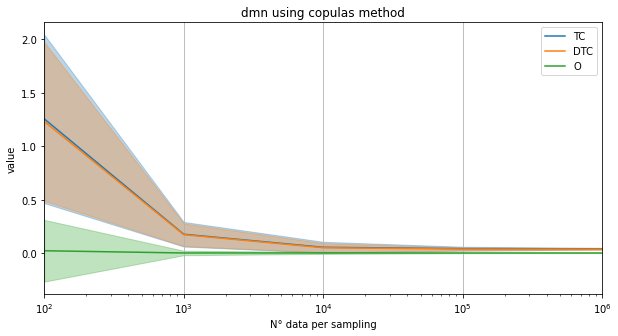

In [19]:
metrics_plot = ["TC", "DTC", "O"]
fig, ax = plt.subplots(figsize=(10,5))
#mean = pd.DataFrame(gaussian_results[gaussian_i]["mean"], columns=["TC", "DTC", "O"], index=[100, 1000, 10000, 100000])
#std = pd.DataFrame(gaussian_results[gaussian_i]["std"], columns=["TC", "DTC", "O"], index=[100, 1000, 10000, 100000])
mean[metrics_plot].plot(ax=ax)
for i, metric_plot in enumerate(metrics_plot):
    ax.fill_between(mean.index, mean[metric_plot]-3*std[metric_plot], mean[metric_plot]+3*std[metric_plot], color=f"C{i}", alpha=0.3)
    #ax.axhline(y=ind['gaussian_2'][metric_plot], color=f'C{i}', linestyle='--')
plt.title('dmn using copulas method')
ax.set_xscale('log')
plt.xlim(10**2, 10**6)
plt.grid(axis="x")
ax.set_xlabel("N° data per sampling")
ax.set_ylabel("value")

plt.savefig('/content/gdrive/My Drive/Teo_info_proyecto_d/dmn_plot.pdf')

In [33]:
# Save arrays
%cd '/content/gdrive/My Drive/Teo_info_proyecto_d'

i = 0
os.mkdir('./Muestras/dmn_arrays')
for s_i in ALL_SAMPLES_DMN:
  
  np.save(f'./Muestras/dmn_arrays/samples{i}.npy',ALL_SAMPLES_DMN[i])
  i+=1

/content/gdrive/My Drive/Teo_info_proyecto_d


In [34]:
# Save pandas df
os.mkdir('./Muestras/dmn_df')
mean.to_csv('./Muestras/dmn_df/mean.csv')
std.to_csv('./Muestras/dmn_df/std.csv')